In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

resources_path = "..\\resources\\"

raw_images_path = resources_path + "\\rawData\\"


def treat(folder_name):
    
    filled_images = []
    
    images_path = os.listdir(raw_images_path + folder_name)

    for image_path in images_path:
        image_to_resize = cv2.imread(raw_images_path + "\\" + folder_name + "\\" + image_path)
        original_image_height, original_image_width = image_to_resize.shape[:2]

        blank_image = np.zeros((1100, 1100, 3), np.uint8)
        blank_image[:, :] = (0, 0, 0)
        blank_image_height, blank_image_width = blank_image.shape[:2]

        filled_image = blank_image.copy()

        y_offset = round((blank_image_height - original_image_height) / 2)
        x_offset = round((blank_image_width - original_image_width) / 2)

        filled_image[y_offset: y_offset + original_image_height, x_offset: x_offset + original_image_width]\
            = image_to_resize.copy()
        
        brightened_image = brighten(filled_image)
        
        # save(image_path, brightened_image)
        
        if len(filled_images) < 3:
            filled_images.append(brightened_image)
            
    return filled_images


def brighten(image):
    return cv2.normalize(image, None, alpha=0, beta=450, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

def plot(images):
    # create figure
    fig = plt.figure(figsize=(50, 50))

    # setting values to rows and column variables
    rows = 2
    columns = 2
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)

    # showing image
    plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("First")

    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)

    # showing image
    plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Second")

    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)

    # showing image
    plt.imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Third")
        
def save(image_name, image):
    cv2.imwrite(resources_path + "trainData\\images\\" + image_name, image)

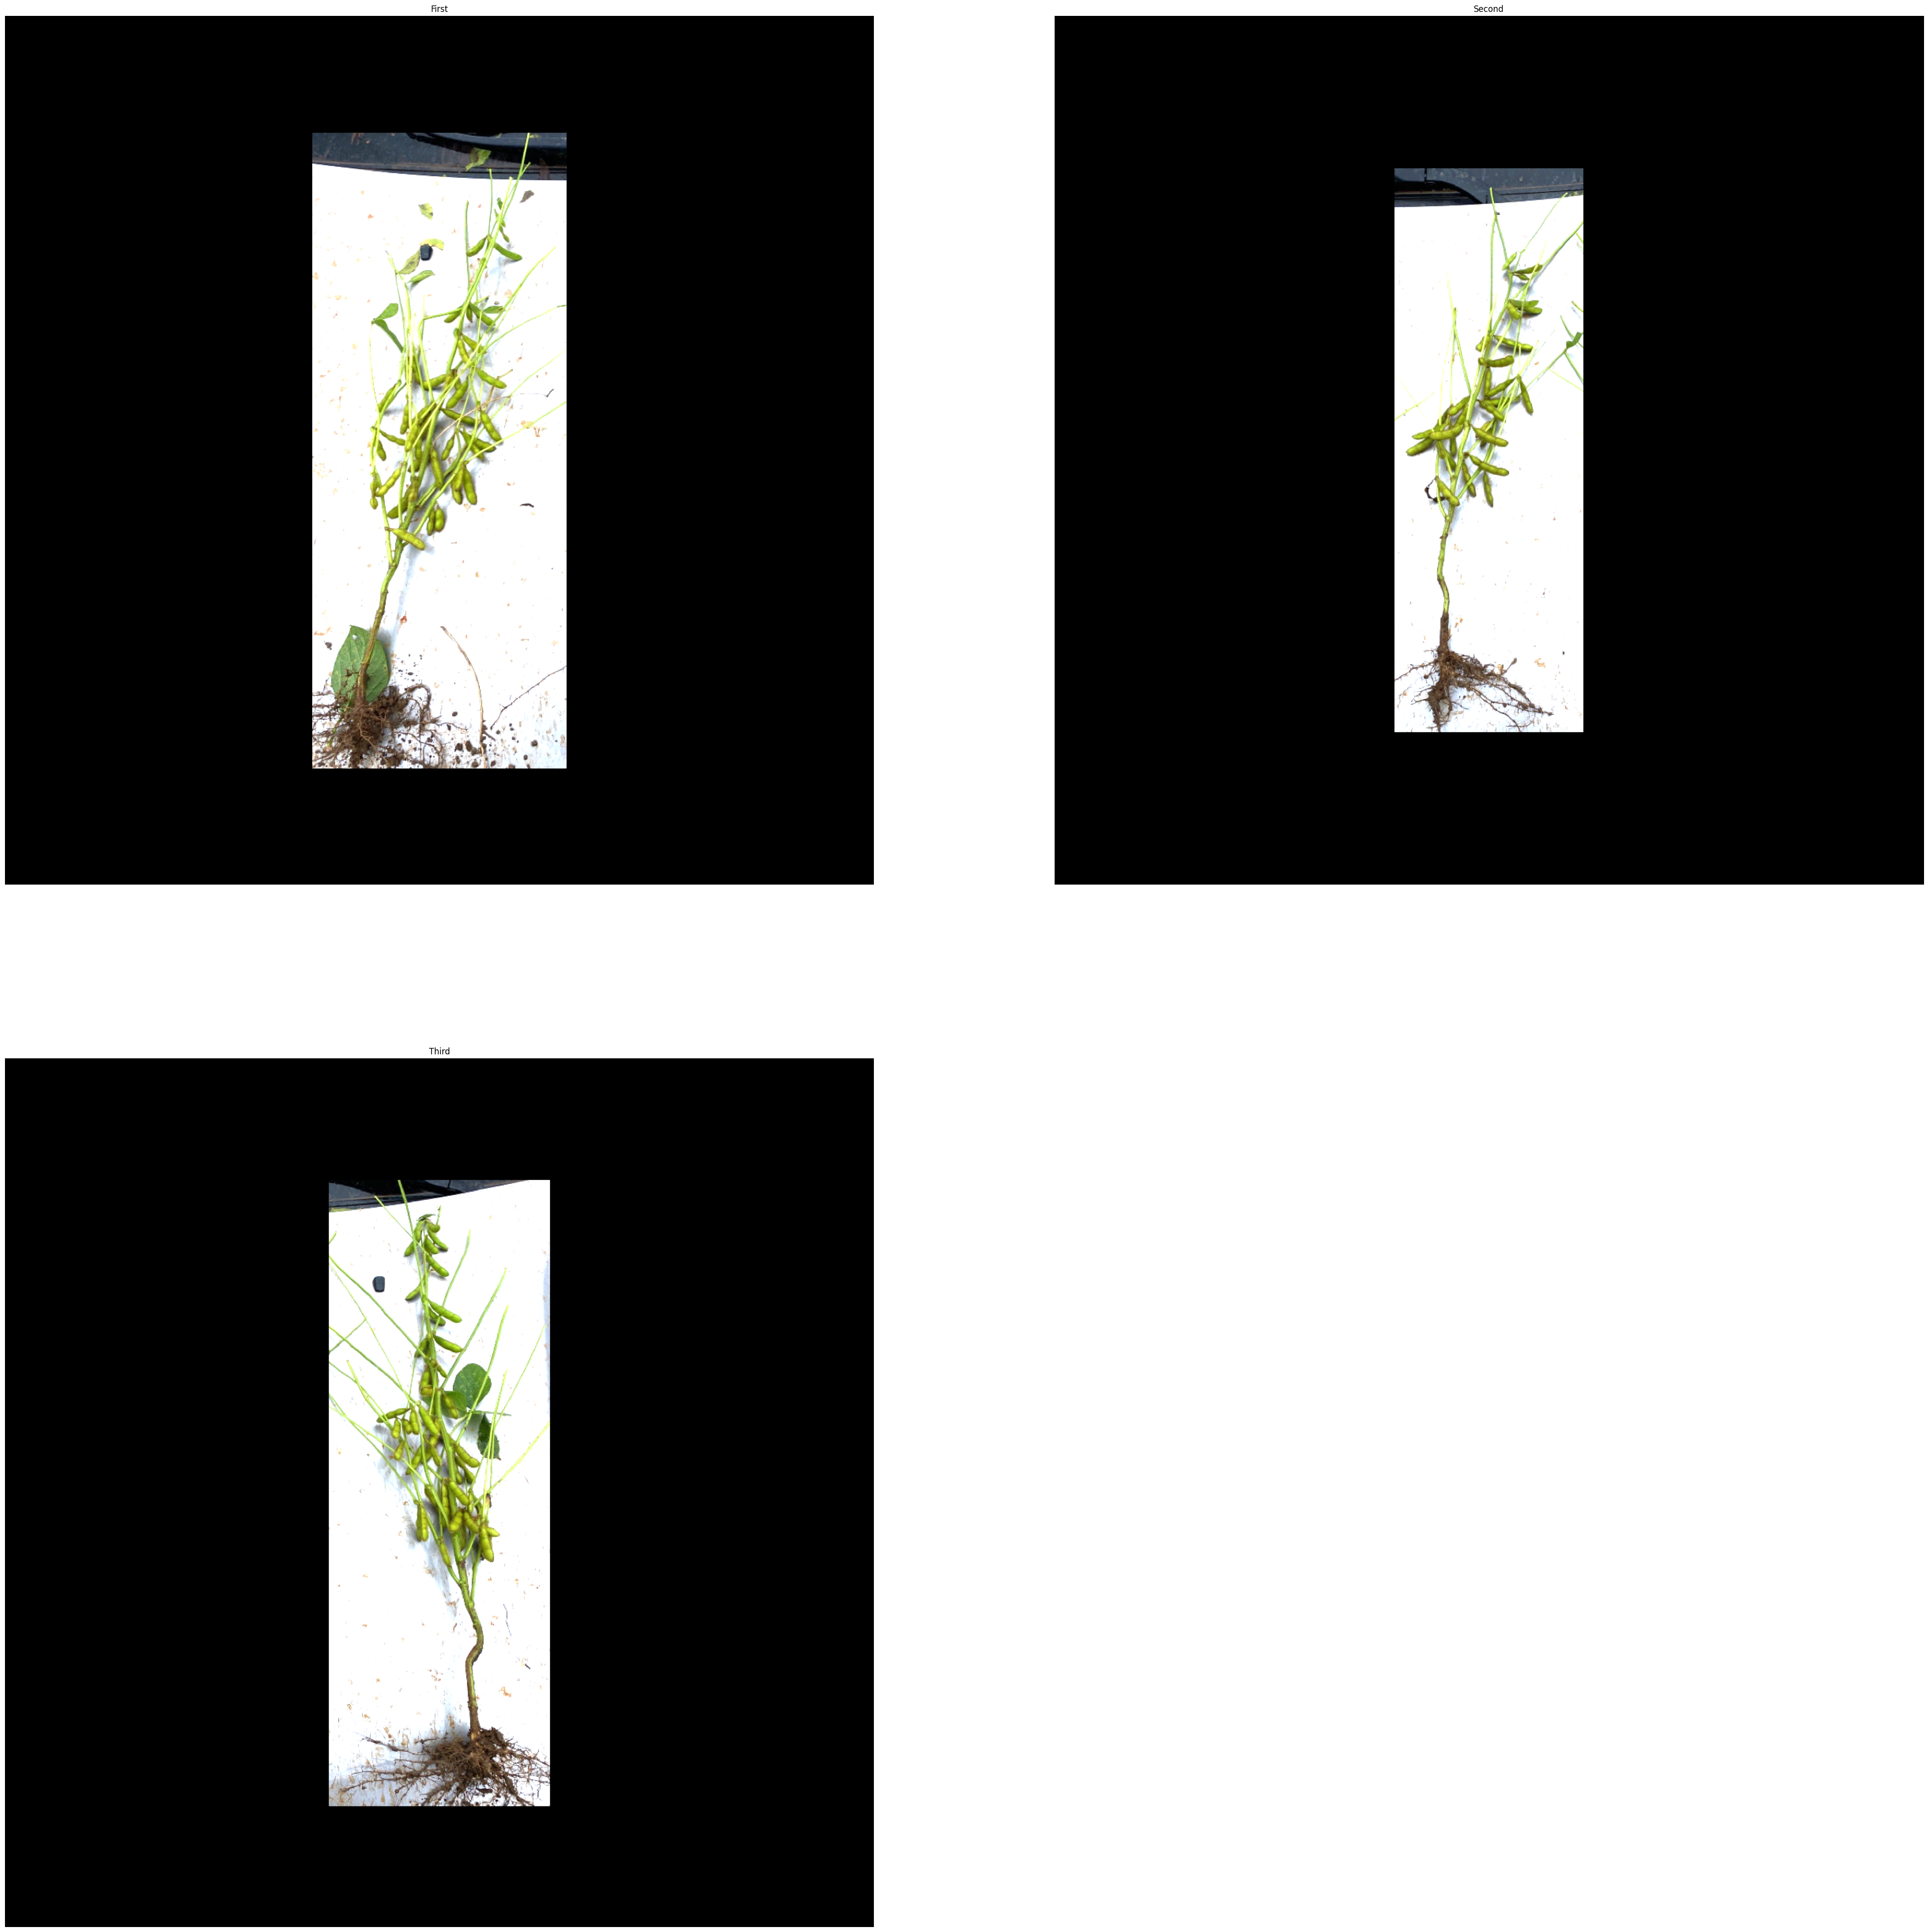

In [2]:
filled_images = treat("01_SELECT22")
plot(filled_images)

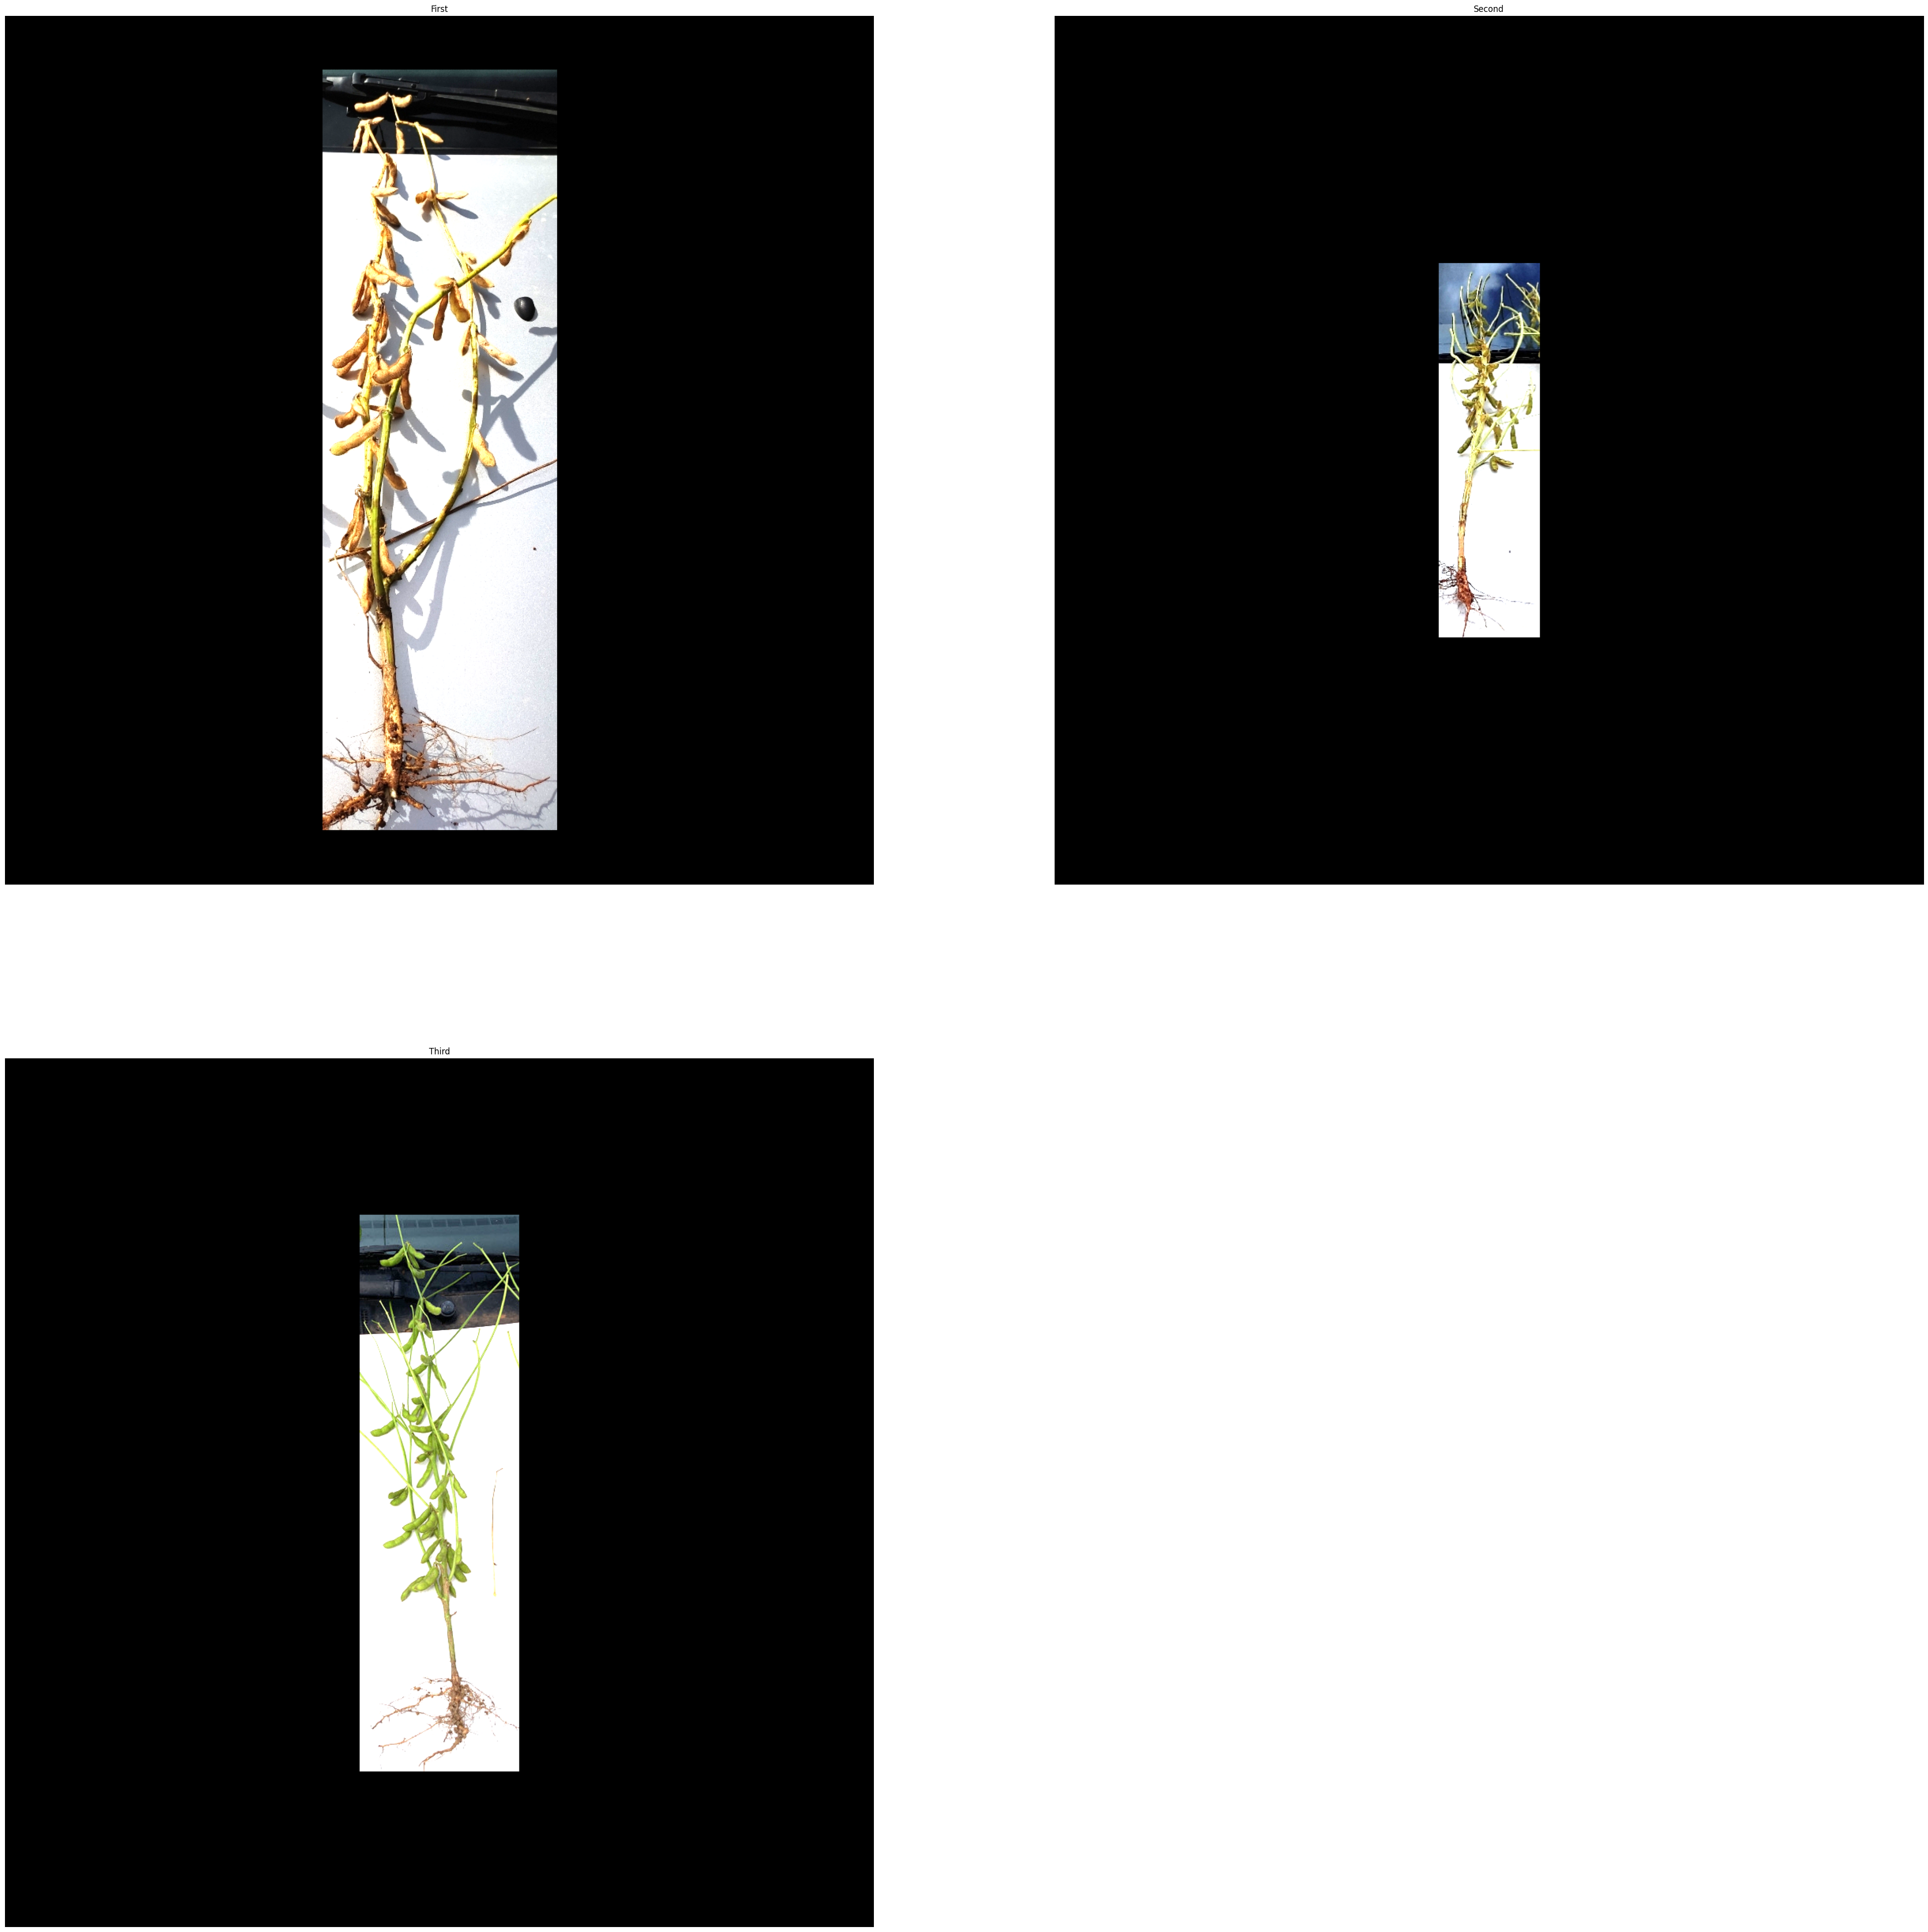

In [3]:
filled_images = treat("01_SELECT21")
plot(filled_images)